# Introduction: Capstone Project Part 2 


Since now we have established a baseline and also performed the null value imputation and prepared our train Data. We would now be applying techniques to 
1. Treat the Imbalance in our data 
2. Apply multiple models to the data and compare the accuracy we get from all of them 
3. Fine tune these models to get the best parameters for optimum score in testing. 

In [29]:
from sklearn.metrics import f1_score
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [20]:
df = pd.read_csv('data/final_train.csv')

In [21]:
df.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,35,2.966667,2,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,0,1,0,0
1,22,4.266667,3,0,-1.7,94.215,-40.3,0.835,4991.6,0,...,0,0,0,0,1,0,1,0,0,1
2,38,0.700000,5,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
3,25,7.366667,2,0,1.4,93.918,-42.7,4.963,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
4,37,1.783333,4,0,1.4,93.444,-36.1,4.964,5228.1,0,...,0,0,0,0,0,1,0,1,0,0


## Imbalance data treatment

In [15]:
# The classes are heavily skewed we need to solve this issue later.
print('Not_Subscribed', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Subscribed', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not_Subscribed 84.63 % of the dataset
Subscribed 10.71 % of the dataset


- Most of the people have not subscribed for term deposit. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms would be biased towards majority class ie., not subscribed. 
- Thus, handling imbalanced data is critical to model prediction

Text(0.5, 1.0, 'Class Distributions in Term Deposit Subscription \n (0: Not Subscribed || 1: Sunscribed)')

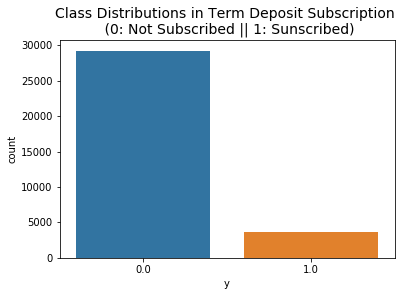

In [16]:
sns.countplot('y', data=df)
plt.title('Class Distributions in Term Deposit Subscription \n (0: Not Subscribed || 1: Sunscribed)', fontsize=14)

In [22]:
# Splitting data into train and validation set:
from sklearn.model_selection import train_test_split 

y=df['y']
X=df.drop('y',axis=1)
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 


Number transactions X_train dataset:  (23065, 39)
Number transactions y_train dataset:  (23065,)
Number transactions X_test dataset:  (9885, 39)
Number transactions y_test dataset:  (9885,)


### Scaling the Data:

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [37]:
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


###  Model Performance without Imbalanced Data Treatement:

In [38]:
from sklearn.metrics import classification_report
# logistic regression object 
lr = LogisticRegression() 

# train the model on train set 
lr.fit(X_train, y_train) 

predictions = lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 


C:\Users\deep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8767
           1       0.67      0.40      0.50      1118

   micro avg       0.91      0.91      0.91      9885
   macro avg       0.80      0.69      0.73      9885
weighted avg       0.90      0.91      0.90      9885



###  Model Performance with Imbalanced Data Treatement: OverSampling - SMOTE

In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_SMOTE.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_SMOTE == 0))) 


Before OverSampling, counts of label '1': 2582
Before OverSampling, counts of label '0': 20483 

After OverSampling, the shape of train_X: (40966, 39)
After OverSampling, the shape of train_y: (40966,) 

After OverSampling, counts of label '1': 20483
After OverSampling, counts of label '0': 20483


In [40]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 
os_f1_score=f1_score(y_test, predictions)
os_accuracy_score=accuracy_score(y_test, predictions)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8767
           1       0.45      0.84      0.58      1118

   micro avg       0.86      0.86      0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885



###  Model Performance with Imbalanced Data Treatement: Undersampling - NearMiss Algorithm

In [41]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 2582
Before Undersampling, counts of label '0': 20483 

After Undersampling, the shape of train_X: (5164, 39)
After Undersampling, the shape of train_y: (5164,) 

After Undersampling, counts of label '1': 2582
After Undersampling, counts of label '0': 2582


In [42]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 
us_f1_score=f1_score(y_test, predictions)
us_accuracy_score=accuracy_score(y_test, predictions)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8767
           1       0.35      0.82      0.49      1118

   micro avg       0.80      0.80      0.80      9885
   macro avg       0.66      0.81      0.68      9885
weighted avg       0.90      0.80      0.83      9885



In [43]:
d = {'Technique': ['UnderSampling (Nearmiss)', 'Oversampling (SMOTE)'], 'Accuracy Score': [us_accuracy_score, os_accuracy_score],'F1 Score':[us_f1_score,os_f1_score]}
final_df = pd.DataFrame(data=d)

final_df

,Technique,Accuracy Score,F1 Score
0,UnderSampling (Nearmiss),0.804047,0.486615
1,Oversampling (SMOTE),0.863935,0.583978


### On the basis of above results, we will use  SMOTE to balance out our data set !

We can see that there has been significant rise in the model's prediction power after applying SMOTE on our data. So the we will now be comparing multiple models based on the SMOTE applied and then compare their results to finalise the model we would be choosing for our data set.

- SMOTE stands for Synthetic Minority Over-sampling Technique.
- Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.
- This is another alternative for solving the "class imbalance problems". 

We can see that there has been significant rise in the model's prediction power after applying SMOTE on our data. So the we will now be comparing multiple models based on the SMOTE applied and then compare their results to finalise the model we would be choosing for our data set.

In [89]:
# Saving the SMOTE data:
SMOTE_training_features = pd.DataFrame(X_SMOTE, columns=list(X_train.columns))
SMOTE_training_labels = pd.DataFrame(y_SMOTE,columns=['y'])
SMOTE_training_features.to_csv('data/SMOTE_training_features.csv',index=False)
SMOTE_training_labels.to_csv('data/SMOTE_training_labels.csv',index=False)
print(SMOTE_training_features.shape, SMOTE_training_labels.shape)

(40966, 39) (40966, 1)


----

## Models to Evaluate

We will compare five different machine learning models using the great [Scikit-Learn library](http://scikit-learn.org/stable/):

1. Logistic Regression
2. Knn Classifier 
3. Decision Tree Classifier 
4. Random Forest Classifier 
5. XGboost Classifier 


To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning. Remember that the default hyperparameters will get a model up and running, but nearly always should be adjusted using some sort of search to find the best settings for your problem! 

Here is what the Scikit-learn documentation [says about the defaults](https://arxiv.org/abs/1309.0238):

    __Sensible defaults__: Whenever an operation requires a user-defined parameter,
    an appropriate default value is defined by the library. The default value
    should cause the operation to be performed in a sensible way (giving a baseline
    solution for the task at hand.)

One of the best parts about scikit-learn is that all models are implemented in an identical manner: once you know how to build one, you can implement an extremely diverse array of models. Here we will implement the entire training and testing procedures for a number of models in just a few lines of code.

In [57]:
from sklearn.metrics import average_precision_score, classification_report

# Function to calculate mean absolute error
def report_cal(y_true, y_pred):
    class_report = classification_report(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    precisionscore = precision_score(y_true, y_pred)
    

    return round(f1score,3), round(precisionscore,3), print(class_report)
    


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(SMOTE_training_features, SMOTE_training_labels)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_class_report = report_cal(y_test, model_pred)
    
    # Return the performance metric
    return model_class_report

In [58]:
SMOTE_training_features.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.389814,0.739347,-0.565916,-0.195129,-1.203854,-0.866759,-1.427637,-1.287379,-0.951776,-0.355353,...,-0.135857,-0.113627,-0.484776,1.965962,-0.516008,-0.497221,-0.493216,2.959881,-2.523690,-0.185466
1,2.010339,0.642362,-0.565916,5.124802,-1.140186,0.771807,0.472729,-1.577396,-2.446259,-0.355353,...,-0.135857,-0.113627,-0.484776,-0.508657,-0.516008,-0.497221,2.027509,-0.337851,-2.523690,5.391819
2,-0.389814,0.723830,-0.565916,-0.195129,0.642497,0.715008,0.883036,0.706349,0.325833,2.814104,...,-0.135857,-0.113627,-0.484776,-0.508657,-0.516008,-0.497221,2.027509,-0.337851,0.396245,-0.185466
3,-0.197802,0.692794,0.524578,-0.195129,0.642497,0.715008,0.883036,0.708082,0.325833,-0.355353,...,-0.135857,-0.113627,-0.484776,-0.508657,-0.516008,-0.497221,2.027509,-0.337851,0.396245,-0.185466
4,-0.485821,0.203986,-0.565916,-0.195129,0.642497,0.715008,0.883036,0.706927,0.325833,-0.355353,...,-0.135857,-0.113627,-0.484776,1.965962,-0.516008,-0.497221,-0.493216,-0.337851,0.396245,-0.185466


In [59]:
from sklearn.metrics import f1_score, precision_score, accuracy_score

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_classreport = fit_and_evaluate(lr)

print('f1score and Precision for Logistic :', lr_classreport)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8767
           1       0.45      0.84      0.58      1118

   micro avg       0.86      0.86      0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885

f1score and Precision for Logistic : (0.584, 0.446, None)


## KNN Classifier 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_classreport = fit_and_evaluate(knn)

print('f1score and Precision for KNN :', knn_classreport)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8767
           1       0.42      0.72      0.53      1118

   micro avg       0.86      0.86      0.86      9885
   macro avg       0.69      0.80      0.73      9885
weighted avg       0.90      0.86      0.87      9885

f1score and Precision for KNN : (0.534, 0.425, None)


## Decision Tree Classifier 

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_classreport = fit_and_evaluate(dt)

print('f1score and Precision for Decision Tree :', dt_classreport)

              precision    recall  f1-score   support

           0       0.96      0.83      0.90      8767
           1       0.37      0.76      0.50      1118

   micro avg       0.83      0.83      0.83      9885
   macro avg       0.67      0.80      0.70      9885
weighted avg       0.90      0.83      0.85      9885

f1score and Precision for Decision Tree : (0.497, 0.369, None)


## Random Forest Classifier 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_classreport = fit_and_evaluate(rf)

print('f1score and Precision  for Random Forest Classifier:', rf_classreport)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8767
           1       0.37      0.86      0.52      1118

   micro avg       0.82      0.82      0.82      9885
   macro avg       0.67      0.84      0.70      9885
weighted avg       0.91      0.82      0.85      9885

f1score and Precision  for Random Forest Classifier: (0.518, 0.371, None)


## XG boost classifier 

In [65]:
from xgboost import XGBRFClassifier
xg = XGBRFClassifier()
xg_classreport = fit_and_evaluate(xg)

print('f1score and Precision for XG Boost Classifier:', xg_classreport)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8767
           1       0.44      0.86      0.58      1118

   micro avg       0.86      0.86      0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885

f1score and Precision for XG Boost Classifier: (0.584, 0.441, None)


<Figure size 576x432 with 0 Axes>

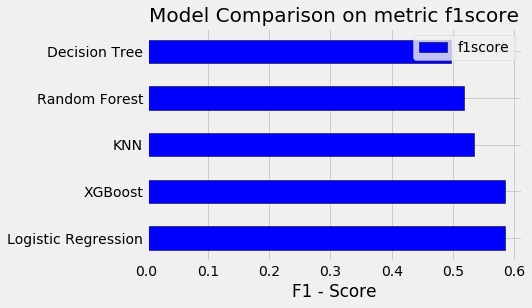

In [66]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=[8, 6])

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'KNN',
                                           'Decision Tree', 'Random Forest',
                                            'XGBoost'],
                                 'f1score': [lr_classreport[0], knn_classreport[0], dt_classreport[0], 
                                         rf_classreport[0], xg_classreport[0]]})

# Horizontal bar chart of test mae
model_comparison.sort_values('f1score', ascending = False).plot(x = 'model', y = 'f1score', kind = 'barh',
                                                           color = 'b', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('F1 - Score'); plt.xticks(size = 14)
plt.title('Model Comparison on metric f1score', size = 20);

Depending on the run (the exact results change slighty each time), the Logistic regressor performs the best followed by the XG boost classifier. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!

From here, We are going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, We will concentrate on using the `LogisticRegressor`. 

# Model Optimization 

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem. 

## Hyperparameters

First off, we need to understand what [model hyperparameters are in contrast to model parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) :

* Model __hyperparameters__ are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression. 
* Model __parameters__ are what the model learns during training, such as the weights in the linear regression.

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features). 

[Tuning the model hyperparameters](http://scikit-learn.org/stable/modules/grid_search.html) controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set. 

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn. Even better, new libraries, such as [TPOT](https://epistasislab.github.io/tpot/) by epistasis labs, is aiming to do this process automatically for you! For now, we will stick to doing this manually (sort of) in Scikit-Learn, but stay tuned for an article on automatic model selection! 

Here we will implement random search with cross validation to select the optimal hyperparameters for the Logistic Regression. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance. 

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and `RandomizedSearchCV` do the process for us! 

### Running the models again with optimised parameters

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Logistic Regression - With hyper parameter tuning

In [81]:
# getting the best parameters for Logistic Regression 
import time

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
lr = LogisticRegression(penalty='l2', random_state=42)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1, scoring='f1')

start_time = time.time()
grid_result = grid.fit(SMOTE_training_features, SMOTE_training_labels)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\canuc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best: 0.877569 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 49.051557302474976 ms


In [82]:
lr_estimator = grid_result.estimator

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1.0, dual= False, max_iter= 100)
lr_classreport = fit_and_evaluate(lr)

print('f1score and Precision for Logistic :', lr_classreport)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8767
           1       0.45      0.84      0.58      1118

   micro avg       0.86      0.86      0.86      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.86      0.88      9885

f1score and Precision for Logistic : (0.584, 0.446, None)


## KNN Classifier - With hyper parameter tuning

In [121]:
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model0 = GridSearchCV(model, param_grid=params, n_jobs=1)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = model0.estimator
knn_classreport = fit_and_evaluate(knn)

print('f1score and Precision for KNN :', knn_classreport)

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      6571
           1       0.57      0.81      0.67       843

    accuracy                           0.91      7414
   macro avg       0.77      0.87      0.81      7414
weighted avg       0.93      0.91      0.92      7414

f1score and Precision for KNN : (0.671, 0.571, None)


## Decision Tree - with hyper parameter tuning

In [84]:
model= DecisionTreeClassifier(random_state=42)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[42]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
start_time = time.time()
model1.fit(SMOTE_training_features, SMOTE_training_labels)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\canuc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
Execution time: 74.84459066390991 ms


In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = model1.estimator
dt_classreport = fit_and_evaluate(dt)

print('f1score and Precision for Decision Tree :', dt_classreport)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8767
           1       0.37      0.75      0.49      1118

   micro avg       0.83      0.83      0.83      9885
   macro avg       0.67      0.79      0.69      9885
weighted avg       0.90      0.83      0.85      9885

f1score and Precision for Decision Tree : (0.493, 0.368, None)


## Random Forest Classifier - With Hyper Parameter Tuning

In [87]:
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[42],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#Learning
start_time = time.time()
model2.fit(scaled_xtrain, y_SMOTE)
#The best hyper parameters set
print("Best Hyper Parameters:",model2.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\canuc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 42}
Execution time: 144.74984288215637 ms


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)
rf_classreport = fit_and_evaluate(rf)

print('f1score and Precision  for Random Forest Classifier:', rf_classreport)

C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8767
           1       0.39      0.90      0.55      1118

   micro avg       0.83      0.83      0.83      9885
   macro avg       0.69      0.86      0.72      9885
weighted avg       0.92      0.83      0.86      9885

f1score and Precision  for Random Forest Classifier: (0.548, 0.394, None)


## XG Boost - With Hyper Parameter Tuning

In [92]:
model=XGBRFClassifier()
#hyper parameters set
params = params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5], 'random_state':[42]
        }

#Making models with hyper parameters sets
model3 = GridSearchCV(model, param_grid=params, n_jobs=-1)

#Learning
start_time = time.time()
model3.fit(scaled_xtrain, y_SMOTE)
#The best hyper parameters set
print("Best Hyper Parameters:",model3.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\canuc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 42}
Execution time: 2239.2772352695465 ms


In [125]:
from xgboost import XGBRFClassifier
xg = model3.estimator
xg_classreport = fit_and_evaluate(xg)

print('f1score and Precision for XG Boost Classifier:', xg_classreport)

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6571
           1       0.35      0.91      0.50       843

    accuracy                           0.79      7414
   macro avg       0.67      0.85      0.69      7414
weighted avg       0.91      0.79      0.83      7414

f1score and Precision for XG Boost Classifier: (0.501, 0.345, None)


<Figure size 576x432 with 0 Axes>

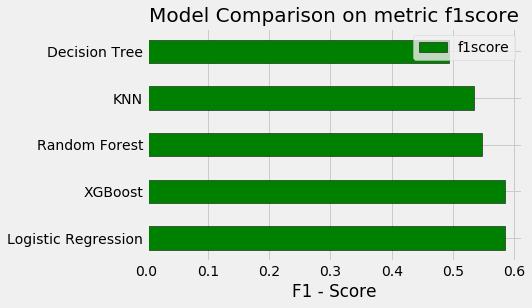

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=[8, 6])

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'KNN',
                                           'Decision Tree', 'Random Forest',
                                            'XGBoost'],
                                 'f1score': [lr_classreport[0], knn_classreport[0], dt_classreport[0], 
                                         rf_classreport[0], xg_classreport[0]]})

# Horizontal bar chart of test mae
model_comparison.sort_values('f1score', ascending = False).plot(x = 'model', y = 'f1score', kind = 'barh',
                                                           color = 'g', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('F1 - Score'); plt.xticks(size = 14)
plt.title('Model Comparison on metric f1score', size = 20);

Since XG boost, Logistic regression are  performing well on the problem and the F1-score shows a significant rise in the training data. We will be using Logistic Regression as our final classification model since it offers Model explainability.